# T4FOXSI2 - Energy Dependance Analysis
### November, 2018
### Milo BC - Berkeley

In [1]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap 
import numpy as np
import astropy.io.fits as pyfits

In [2]:
ang = [-82.5000, -75.0000, 67.5000, 75.0000, -97.5000, -90.0000, 60.0000]  ## Detector angles
x,y = 200, 750 ## Target center

### Defining transparent colors:

In [3]:
tred = {'red' :  ((0.0, 0.0, 1.0), 
                    (1.0, 1.0, 0.0)), 
        'green': ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'blue':  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'alpha': ((0.0, 0.0, 0.0), 
                    (1.0, 1.0, 0.0))}

tgreen = {'red' :  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'green': ((0.0, 0.0, 1.0), 
                    (1.0, 1.0, 0.0)), 
        'blue':  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'alpha': ((0.0, 0.0, 0.0), 
                    (1.0, 0.9, 0.0))}

txray = {'red' :  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'green': ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'blue':  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'alpha': ((0.0, 0.0, 0.0), 
                    (1.0, 0.9, 0.0))}


tred   = LinearSegmentedColormap('tred', tred) 
tgreen = LinearSegmentedColormap('tgreen', tgreen) 
txray = LinearSegmentedColormap('txray', txray) 

# T4 - Det6

### T4 - Det6 data:

In [4]:
T4D6 = pyfits.open('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/T4FOXSI2/T4_Fits/foxsi_T4_d6.fits')

### Active Region 1

In [16]:
Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/T4FOXSI2/makerays/Rays_Energy_Roughness_12AA/rays/T4FOXSI2T4AR1F2_rays.csv')

# Fix little bug in rays:
for ray in Brays:
    ray.hist = ray.hist.tolist()
# Create detector :
detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230], # This is corrected by the detectors-paper distance
                    reso = [1024,1024])
# Detector Catch rays:
detector.catchRays(Brays)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/T4FOXSI2/makerays/Rays_Energy_Roughness_12AA/rays/T4FOXSI2T4AR1F2_rays.csv loaded.


In [17]:
'''Defining D, H, and P rays for each blocker size: '''
Drays = [ray for ray in Brays if (ray.des[2]==230 and ray.bounces ==2 )]
Srays = [ray for ray in Brays if (ray.des[2]==230 and ray.bounces ==1 and ray.tag[-8:] == 'Source-D')]
Hrays = [ray for ray in Brays if (ray.des[2]==230 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
Prays = [ray for ray in Brays if (ray.des[2]==230 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

#sim_scale = 17.18880   # 1cm = 17.4 arcmin
sim_scale = 1031.328   # 1cm = 1031.328 arcsec

#Hyperboloid
Hx, Hy, EH = [], [], []
for ray in Hrays:
    if 10. >= ray.energy >= 4.5:
        Hx.append(ray.pos[0]*sim_scale + x)
        Hy.append(ray.pos[1]*sim_scale + y)
        EH.append(ray.energy)
    
# Paraboloid
Px, Py, EP = [], [], []
for ray in Prays:
    if 10. >= ray.energy >= 4.5:
        Px.append(ray.pos[0]*sim_scale + x)
        Py.append(ray.pos[1]*sim_scale + y)
        EP.append(ray.energy)
    
# Double
Dx, Dy, ED = [], [], []
for ray in Drays:
    if 10. >= ray.energy >= 4.5:
        Dx.append(ray.pos[0]*sim_scale + x)
        Dy.append(ray.pos[1]*sim_scale + y)
        ED.append(ray.energy)


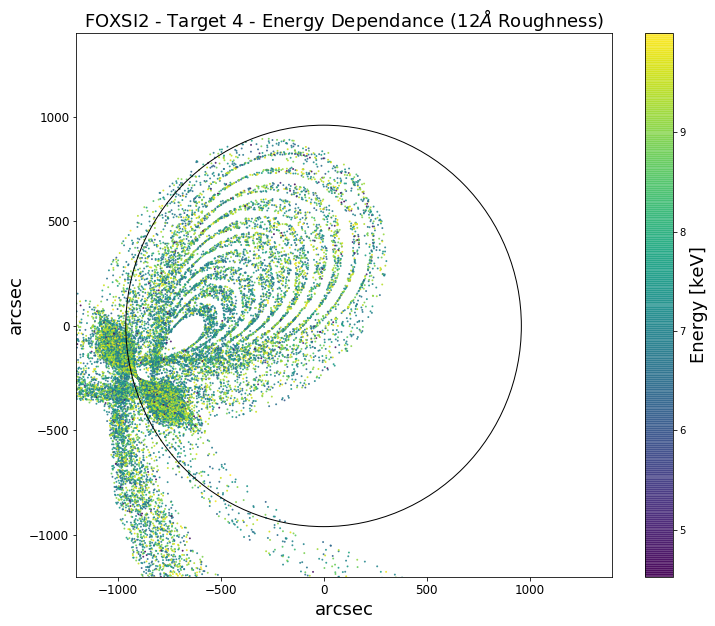

In [18]:
## Plotting
fig, ax = plt.subplots(figsize=(12,10));
## AR1
fH = plt.scatter(Hx,Hy,c=EH,s=.92,alpha=0.8)
fP = plt.scatter(Px,Py,c=EP,s=.92,alpha=0.8)
fD = plt.scatter(Dx,Dy,c=ED,s=.92,alpha=0.8)
cb = plt.colorbar(fD)
cb.set_label(label='Energy [keV]',size=18)
## ornaments
plt.xlim(-1200,1400)
plt.ylim(-1200,1400)
plt.xlabel('arcsec',fontsize=18)
plt.ylabel('arcsec',fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('FOXSI2 - Target 4 - Energy Dependance (12$\AA$ Roughness)',fontsize=18)
## FOXSI2-Data
#ax.imshow(T4D6[0].data,origin='lower',cmap=txray,extent=[-402,795,155,1352])
## Pos6 - Si
#l = 990
#mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[6]-45)) + 1)
#my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[6]-135)) + 1)
#rect = patches.Rectangle((x-l/2+mx,y-l/2+my),990,990,angle=ang[6],linewidth=1,edgecolor='r',facecolor='none')
#ax.add_patch(rect)
circ = patches.Circle((0,0),radius= 960,fill=False);ax.add_patch(circ)
plt.show()

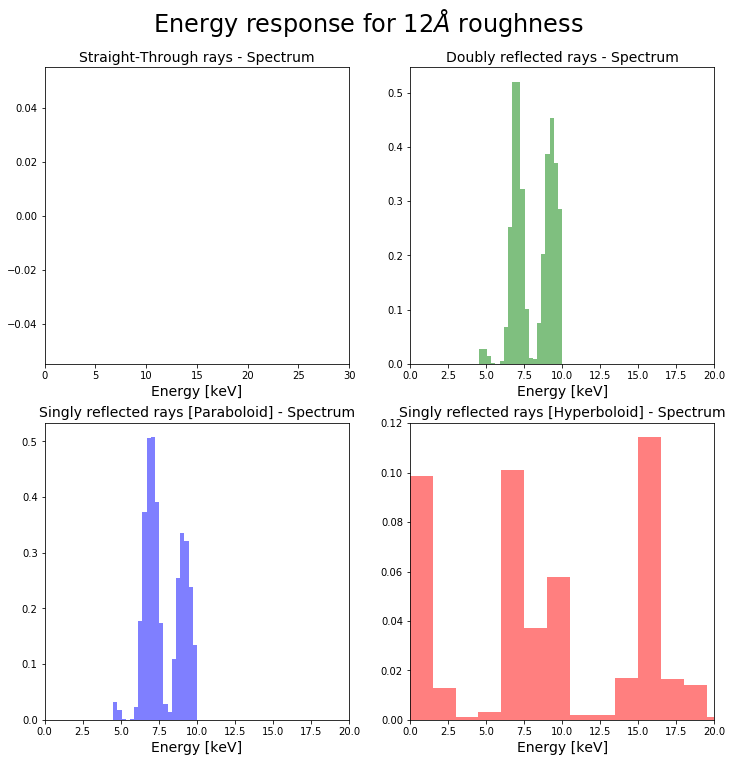

In [21]:
fig = plt.figure(figsize=(12,12))
st = fig.suptitle("Energy response for 12$\AA$ roughness", fontsize=24,y=.95)
## Straight-Through
plt.subplot(2,2,1)
plt.hist([ray.energy for ray in Srays], density=True, label='rays on detector',color='grey',bins=20,alpha=.5)
plt.xlabel('Energy [keV]',fontsize=14)
plt.title('Straight-Through rays - Spectrum',fontsize=14)
plt.xlim(0,30)
plt.yticks(fontsize=10);plt.xticks(fontsize=10)
## Doubles
plt.subplot(2,2,2)
plt.hist(ED, density=True, label='rays on detector',color='g',bins=20,alpha=.5)
plt.xlabel('Energy [keV]',fontsize=14)
plt.title('Doubly reflected rays - Spectrum',fontsize=14)
plt.xlim(0,20)
plt.yticks(fontsize=10);plt.xticks(fontsize=10)
## Paraboloids
plt.subplot(2,2,3)
plt.hist(EP, density=True, label='rays on detector',color='b',bins=20,alpha=.5)
plt.xlabel('Energy [keV]',fontsize=14)
plt.title('Singly reflected rays [Paraboloid] - Spectrum',fontsize=14)
plt.xlim(0,20)
plt.yticks(fontsize=10);plt.xticks(fontsize=10)
## Hyperboloids
plt.subplot(2,2,4)
plt.hist([ray.energy for ray in Hrays], density=True, label='rays on detector',color='r',bins=20,alpha=.5)
plt.xlabel('Energy [keV]',fontsize=14)
plt.title('Singly reflected rays [Hyperboloid] - Spectrum',fontsize=14)
plt.xlim(0,20)
plt.yticks(fontsize=10);plt.xticks(fontsize=10)
plt.show()